In [1]:
#Imports
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from skimage import io

from scipy.signal import convolve2d


In [2]:
#Leo la imagen
directorio="compartir"
nombre_imagen="sum_bordes.npy"
nombre_segmentacion="n_segments.npy"
nombre_bordes_std="canny.npy"

bordes=np.load(os.path.join(directorio,nombre_imagen))
bordes_std=np.load(os.path.join(directorio,nombre_bordes_std))

segmentacion=np.load(os.path.join(directorio,nombre_segmentacion))




In [3]:
#leemos la imagen inicial y los bordes reales
directorio="compartir"
nombre_imagen="imagen_org.jpg"
nombre_bordes="bordes_image_G_S.npy"

imagen_org = cv2.imread(os.path.join(directorio,nombre_imagen))
imagen_org=cv2.cvtColor(imagen_org, cv2.COLOR_BGR2RGB)
bordes_image_G_S=np.load(os.path.join(directorio,nombre_bordes))

#leemos la foto con la que trabajamos

foto=np.load(os.path.join(directorio,"foto.npy"))
foto=str(foto)

(-0.5, 320.5, 480.5, -0.5)

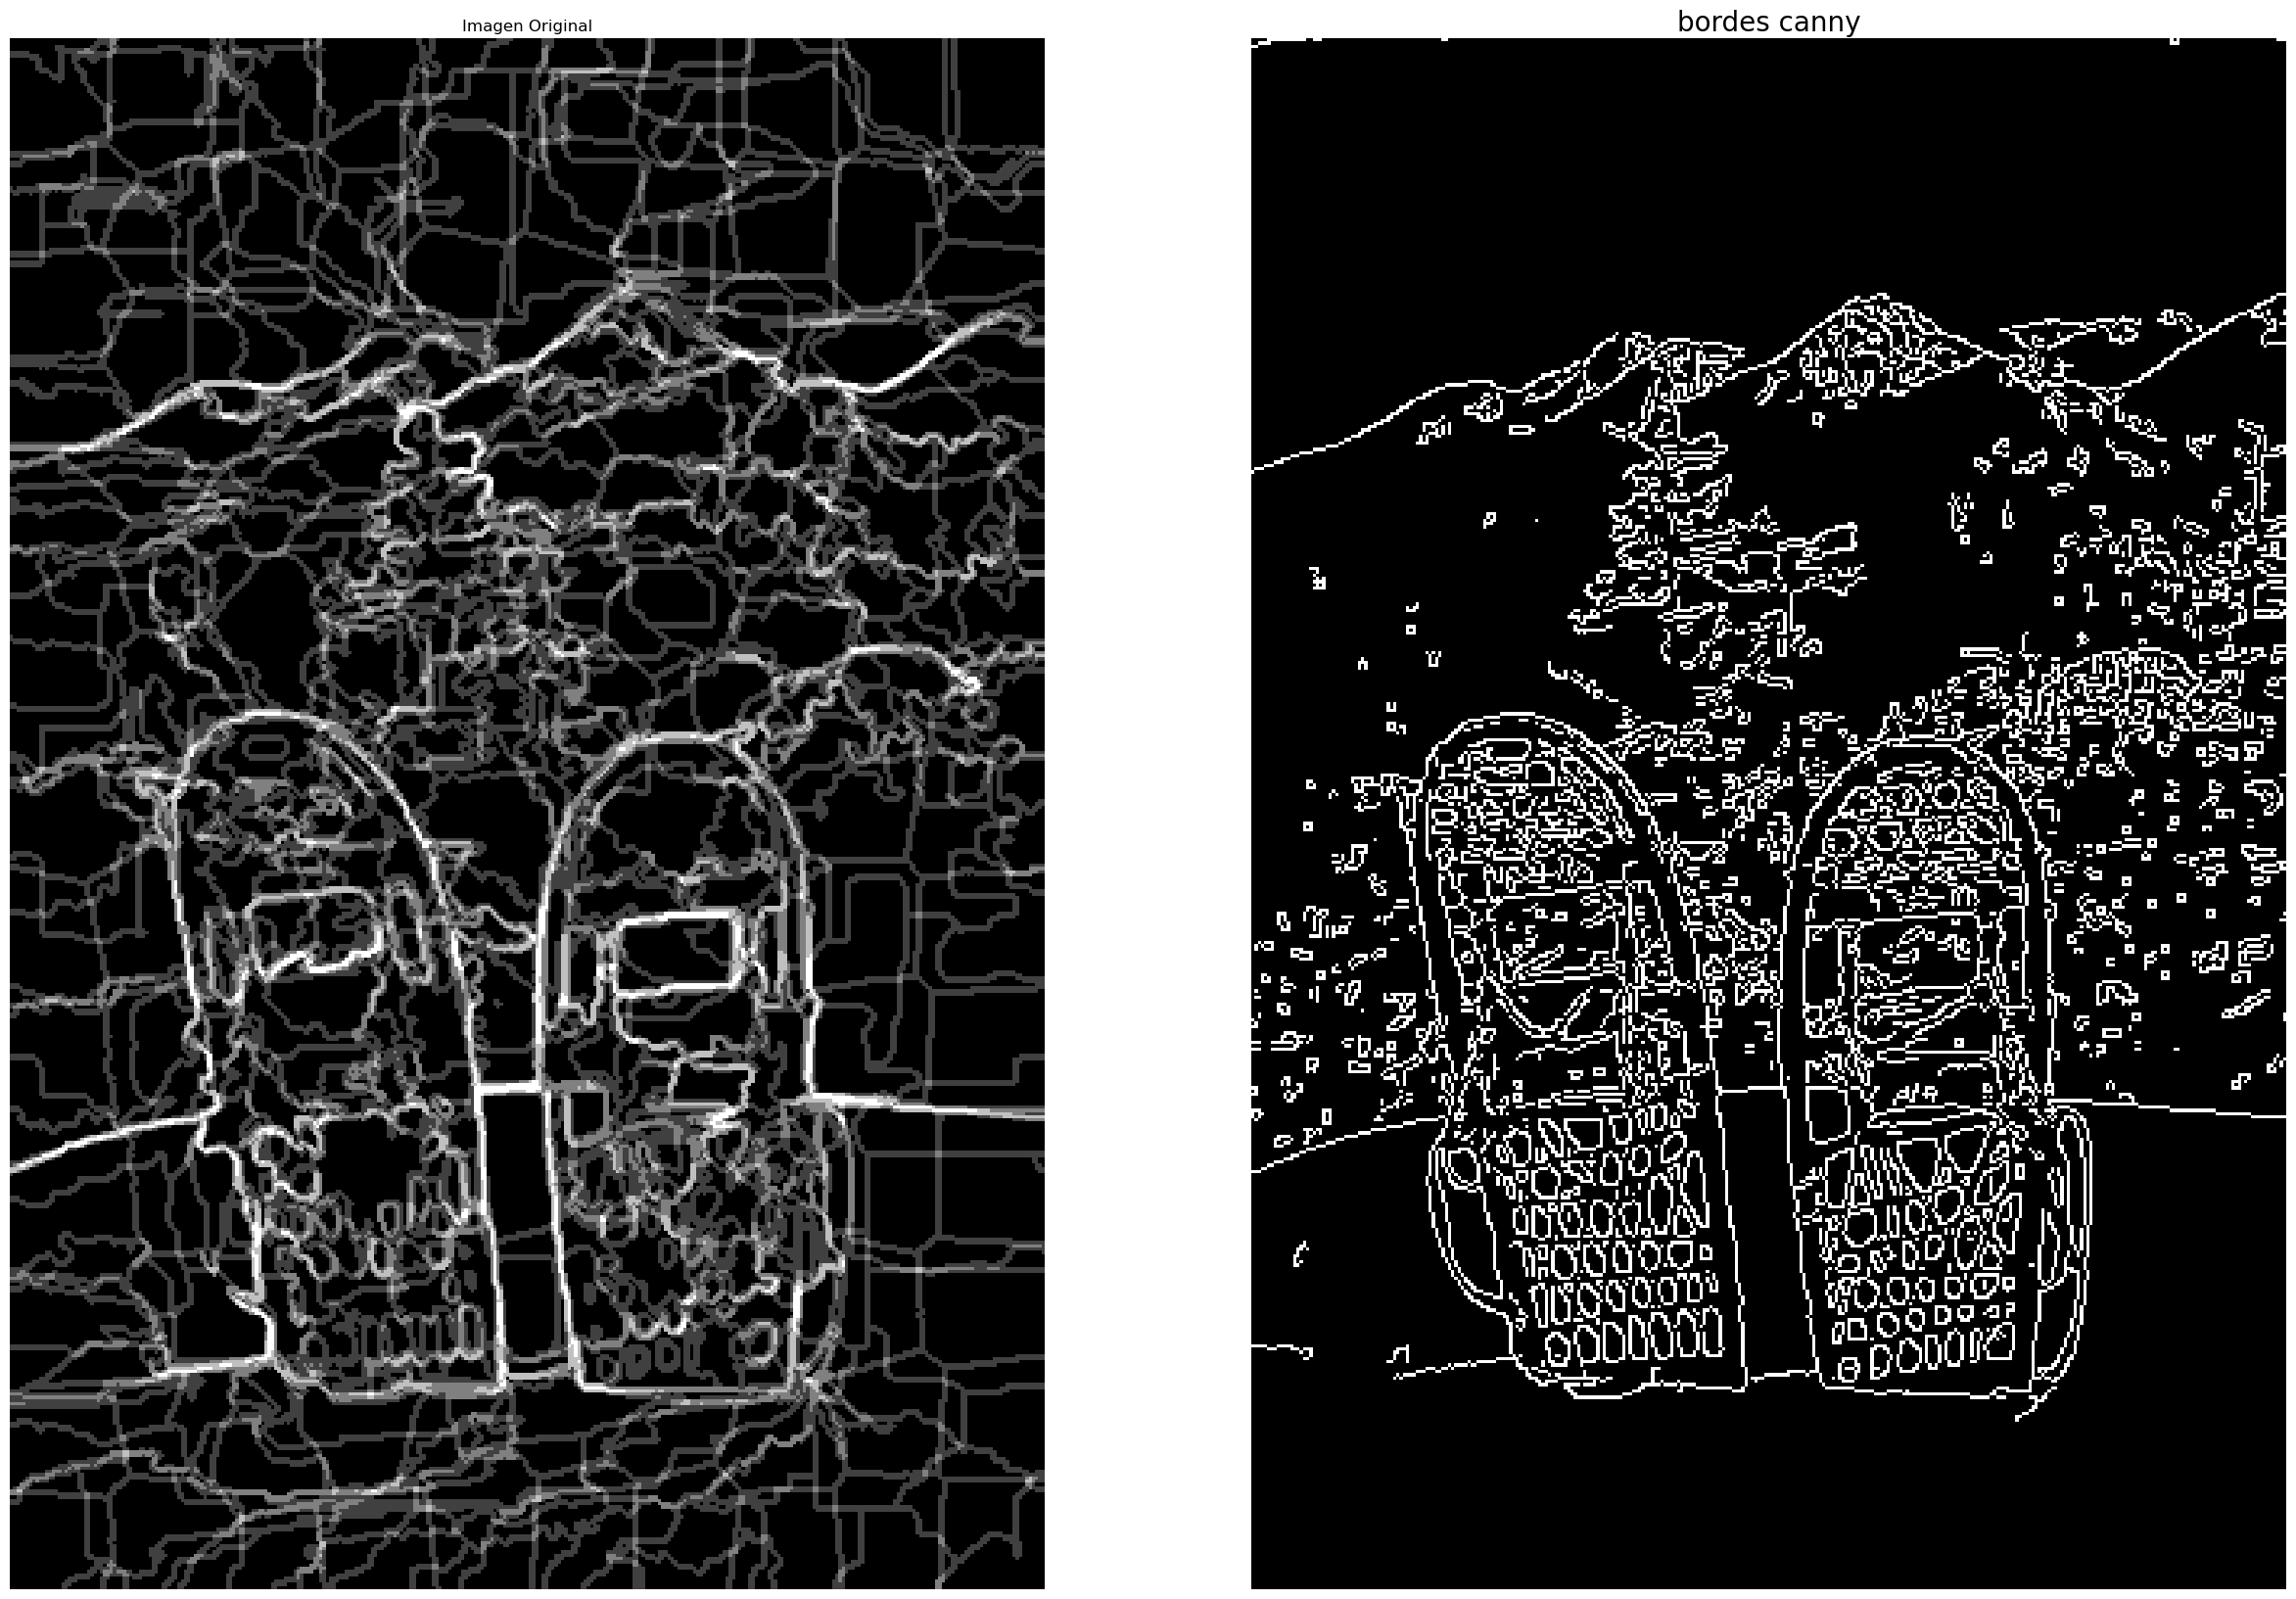

In [4]:
#la muestro en pantalla para ver lo que he leido

plt.figure(figsize=(30, 30))
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(bordes, cmap="grey")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('bordes canny',fontsize=20)
plt.imshow(bordes_std, cmap="grey")
plt.axis('off')


In [5]:
np.unique(bordes_std)

array([0, 1], dtype=uint8)

In [6]:
#convertir para poder grabar
bordes_foto=np.copy(imagen_org)
bordes_std_foto=np.copy(imagen_org)

bordes_foto[:,:,0]=bordes*255
bordes_foto[:,:,1]=bordes*255
bordes_foto[:,:,2]=bordes*255

bordes_std_foto[:,:,0]=bordes_std*255
bordes_std_foto[:,:,1]=bordes_std*255
bordes_std_foto[:,:,2]=bordes_std*255

#guardado de imagenes para memoria

memoria="imagenes_memoria"
io.imsave(os.path.join(memoria,"bordes_todos_"+ foto+".jpg"), bordes_foto)
io.imsave(os.path.join(memoria,"bordes_canny_"+ foto+".jpg"), bordes_std_foto)

In [7]:
np.unique(bordes)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [8]:
#si aplico antes la suma de bordes que convolucion
bordes=bordes+bordes_std

In [9]:
#aplico un kernel para potenciar un punto si tiene alrededor mas puntos (riesgo que cruces sean potenciados)
# Definir un kernel de convolución
kernel = np.array([[0.25, 0.25, 0.25],
                   [0.25, 1, 0.25],
                   [0.25, 0.25,0.25]])

# Aplicar la convolución utilizando la función convolve2d de SciPy
bordes1 = convolve2d(bordes, kernel, mode='same')
print(bordes.shape, bordes1.shape)

(481, 321) (481, 321)


In [10]:
#la muestro en pantalla para ver lo que he leido
# plt.figure(figsize=(20, 20))
# plt.title('bordes >1')
# plt.imshow(bordes1, cmap="grey")
# plt.axis('off')

In [11]:
np.unique(bordes1)

array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
       0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
       1.    , 1.0625, 1.125 , 1.1875, 1.25  , 1.3125, 1.375 , 1.4375,
       1.5   , 1.5625, 1.625 , 1.6875, 1.75  , 1.8125, 1.875 , 1.9375,
       2.    , 2.0625, 2.125 , 2.1875, 2.25  , 2.3125, 2.375 , 2.4375,
       2.5   , 2.5625, 2.625 , 2.6875, 2.75  , 2.8125, 2.875 , 2.9375,
       3.    , 3.0625, 3.125 , 3.1875, 3.25  , 3.3125, 3.375 , 3.4375,
       3.5   , 3.5625, 3.625 , 3.6875, 3.75  , 3.8125, 3.875 , 3.9375,
       4.    , 4.0625, 4.125 , 4.1875, 4.25  , 4.3125, 4.375 , 4.4375,
       4.5   , 4.5625, 4.625 , 4.6875, 4.75  , 4.875 , 4.9375, 5.    ])

In [12]:
#convertir para poder grabar
bordes1_foto=np.copy(imagen_org)

bordes1_foto[:,:,0]=(bordes1*255)/5
bordes1_foto[:,:,1]=(bordes1*255)/5
bordes1_foto[:,:,2]=(bordes1*255)/5

io.imsave(os.path.join(memoria,"bordes_flitrados_"+ foto+".jpg"), bordes1_foto)

In [13]:
np.unique(bordes1)

array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
       0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
       1.    , 1.0625, 1.125 , 1.1875, 1.25  , 1.3125, 1.375 , 1.4375,
       1.5   , 1.5625, 1.625 , 1.6875, 1.75  , 1.8125, 1.875 , 1.9375,
       2.    , 2.0625, 2.125 , 2.1875, 2.25  , 2.3125, 2.375 , 2.4375,
       2.5   , 2.5625, 2.625 , 2.6875, 2.75  , 2.8125, 2.875 , 2.9375,
       3.    , 3.0625, 3.125 , 3.1875, 3.25  , 3.3125, 3.375 , 3.4375,
       3.5   , 3.5625, 3.625 , 3.6875, 3.75  , 3.8125, 3.875 , 3.9375,
       4.    , 4.0625, 4.125 , 4.1875, 4.25  , 4.3125, 4.375 , 4.4375,
       4.5   , 4.5625, 4.625 , 4.6875, 4.75  , 4.875 , 4.9375, 5.    ])

In [14]:
#le sumo la información de la deteccion de borde estandar

In [15]:
#bordes2=bordes1+bordes_std
bordes2=bordes1 #si pongo antes la union que la convolucion

In [16]:
#la muestro en pantalla para ver el resultado
# plt.figure(figsize=(20, 20))
# plt.title('bordes + bordes_std')
# plt.imshow(bordes2, cmap="grey")
# plt.axis('off')

In [17]:
#convertir para poder grabar
bordes2_foto=np.copy(imagen_org)

bordes2_foto[:,:,0]=(bordes2/5)*255
bordes2_foto[:,:,1]=(bordes2/5)*255
bordes2_foto[:,:,2]=(bordes2/5)*255


io.imsave(os.path.join(memoria,"bordes_union_"+ foto+".jpg"), bordes2_foto)

In [18]:
np.unique(bordes2_foto)

array([  0,   3,   6,   9,  12,  15,  19,  22,  25,  28,  31,  35,  38,
        41,  44,  47,  51,  54,  57,  60,  63,  66,  70,  73,  76,  79,
        82,  86,  89,  92,  95,  98, 102, 105, 108, 111, 114, 117, 121,
       124, 127, 130, 133, 137, 140, 143, 146, 149, 153, 156, 159, 162,
       165, 168, 172, 175, 178, 181, 184, 188, 191, 194, 197, 200, 204,
       207, 210, 213, 216, 219, 223, 226, 229, 232, 235, 239, 242, 248,
       251, 255], dtype=uint8)

In [19]:
umbral=np.percentile(np.unique(bordes2), 50)
#umbral=1.5
print("umbral:",umbral)
bordes3=np.where(bordes2>umbral,1,0)
#la muestro en pantalla para ver lo que he leido
# plt.figure(figsize=(20, 20))
# plt.title('bordes>umbral tras kernel')
# plt.imshow(bordes3, cmap="grey")
# plt.axis('off')

umbral: 2.46875


(-0.5, 320.5, 480.5, -0.5)

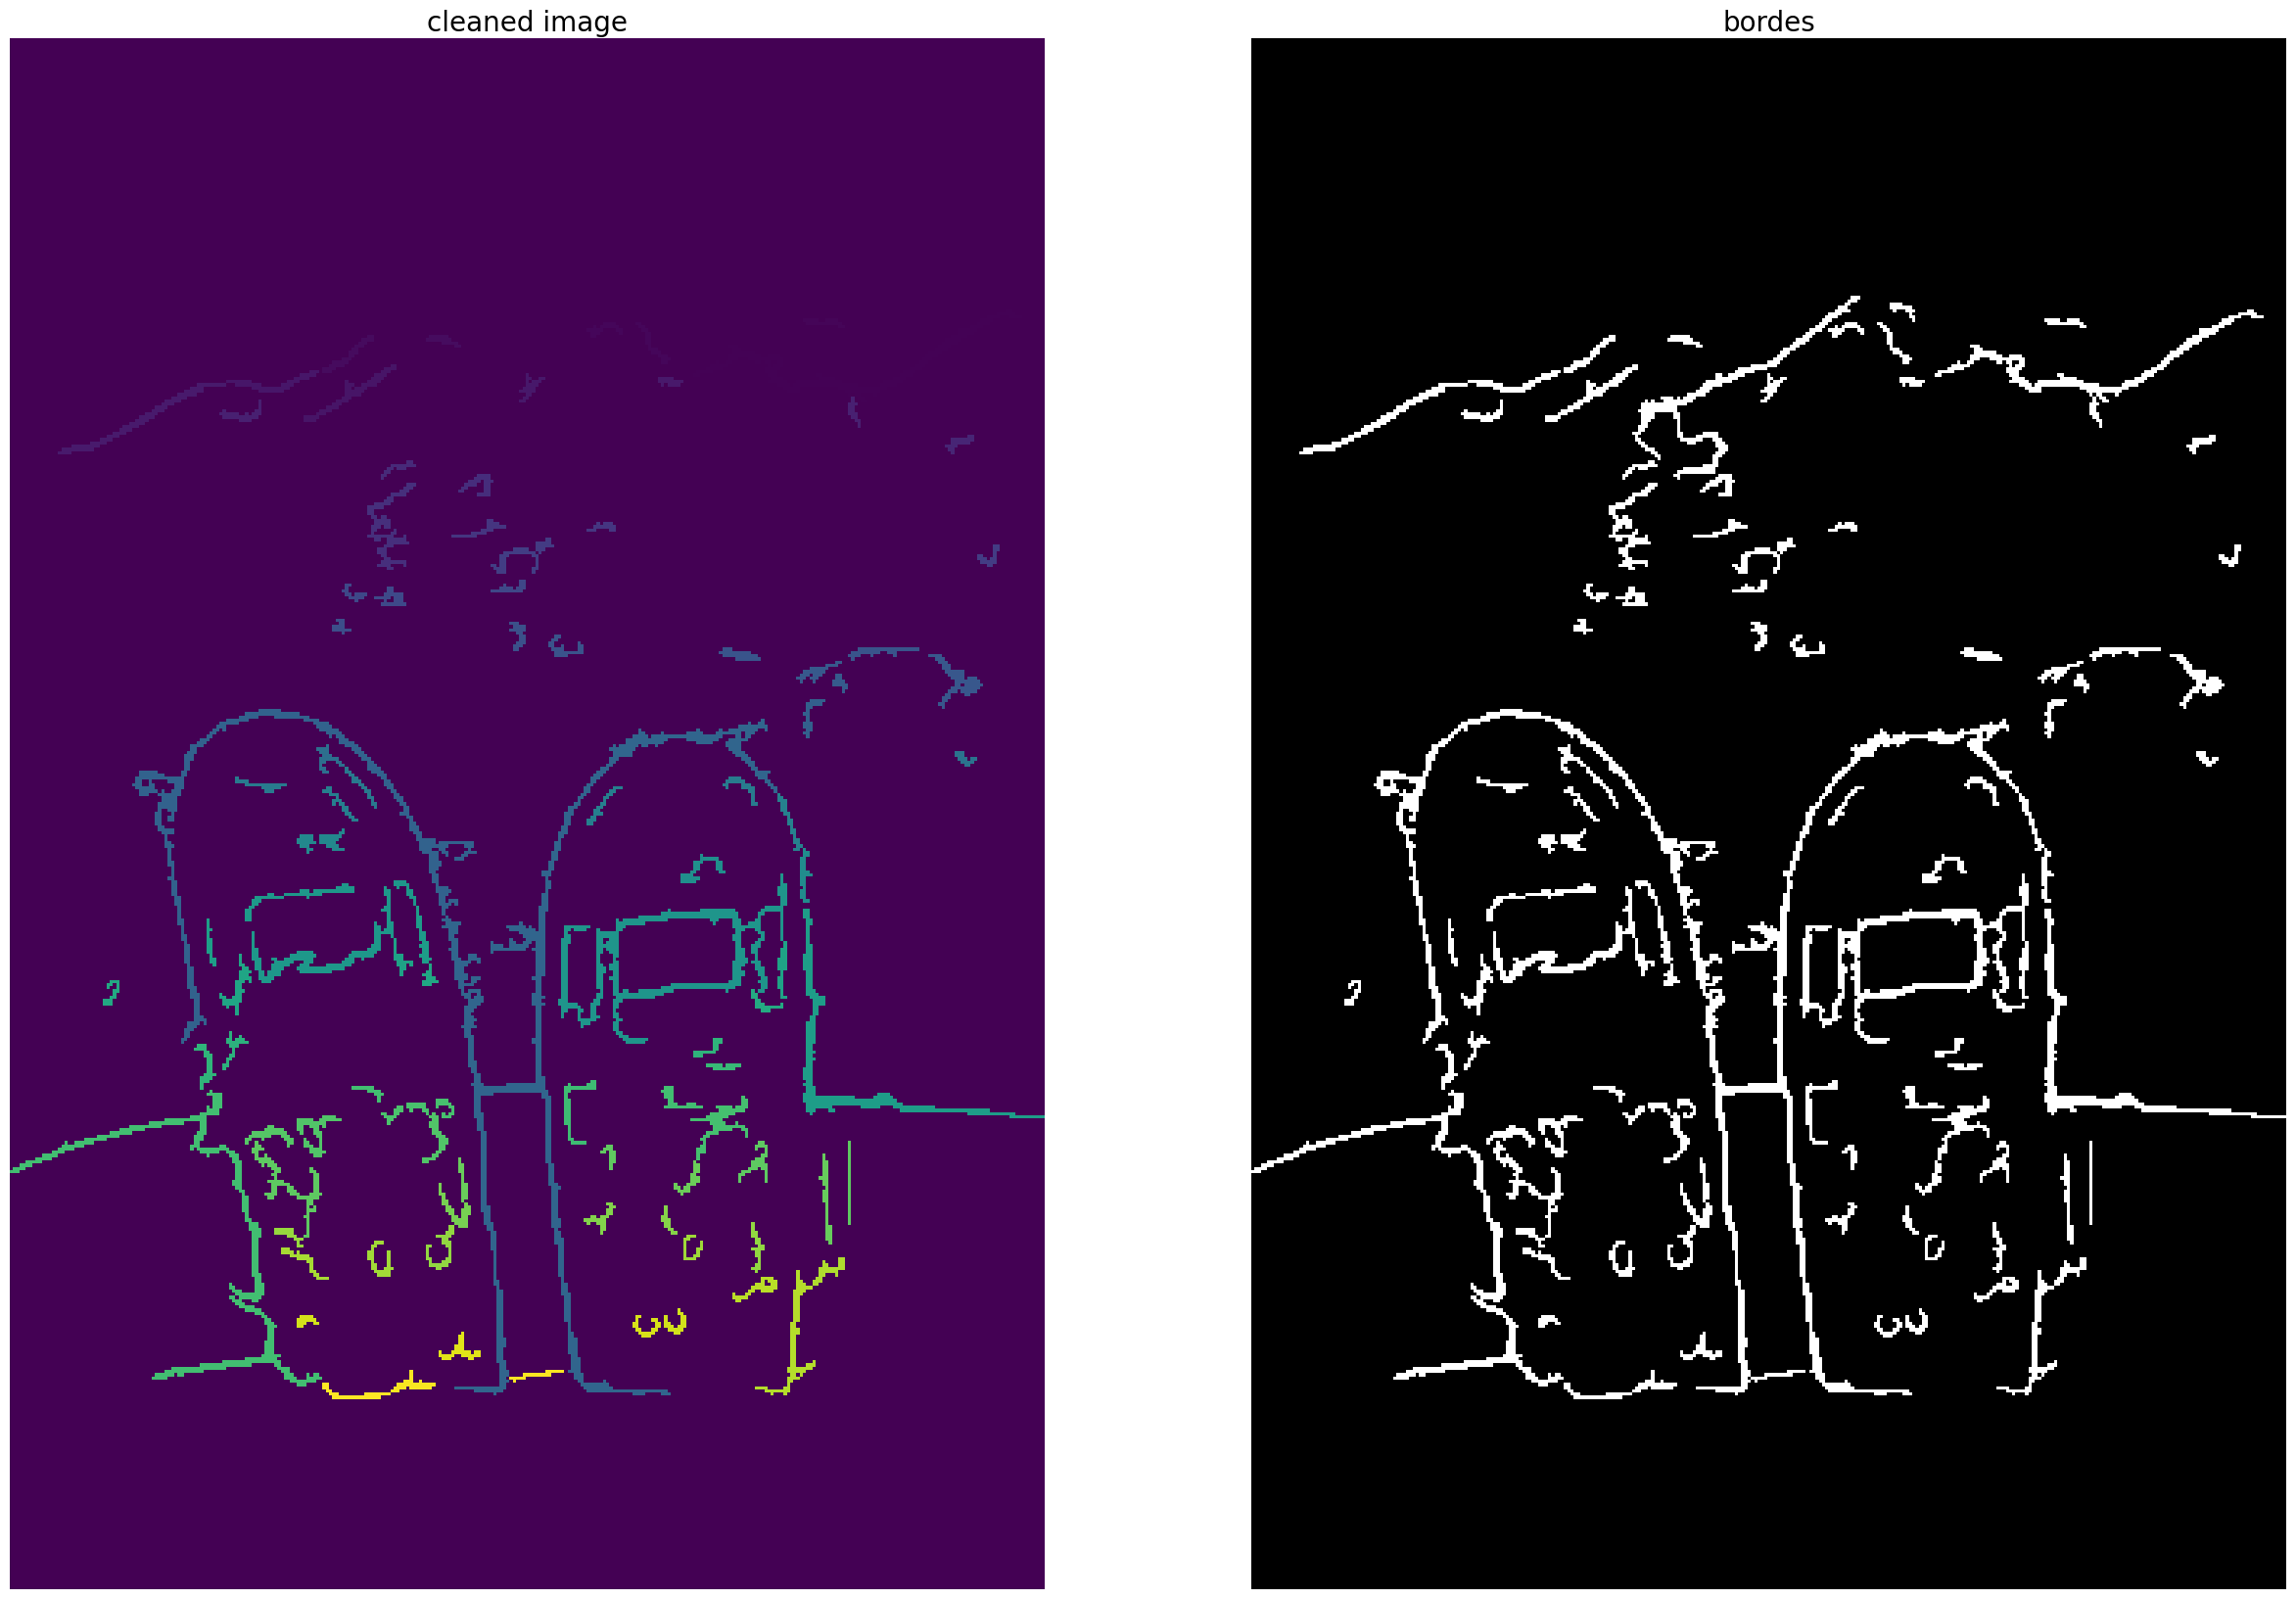

In [38]:
#eliminar pequeños version diferente
from scipy import ndimage
from skimage.morphology import remove_small_objects

# Etiquetar regiones conectadas
labeled_image, num_features = ndimage.label(bordes3)

# Eliminar objetos pequeños
min_size = 16  
cleaned_image = remove_small_objects(labeled_image, min_size=min_size)

bordes4=(np.where(cleaned_image>0,255,0)).astype(np.uint8)

# plt.figure(figsize=(30, 30))
# plt.subplot(1, 2, 1)
# plt.title('cleaned image',fontsize=20)
# plt.imshow(cleaned_image)
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.title('bordes',fontsize=20)
# plt.imshow(bordes4, cmap="grey")
# plt.axis('off')


In [21]:
#convertir para poder grabar
bordes4_foto=np.copy(imagen_org)

bordes4_foto[:,:,0]=bordes4
bordes4_foto[:,:,1]=bordes4
bordes4_foto[:,:,2]=bordes4


io.imsave(os.path.join(memoria,"bordes_limpios_"+ foto+".jpg"), bordes4)

(481, 321) [  0 255]


(-0.5, 320.5, 480.5, -0.5)

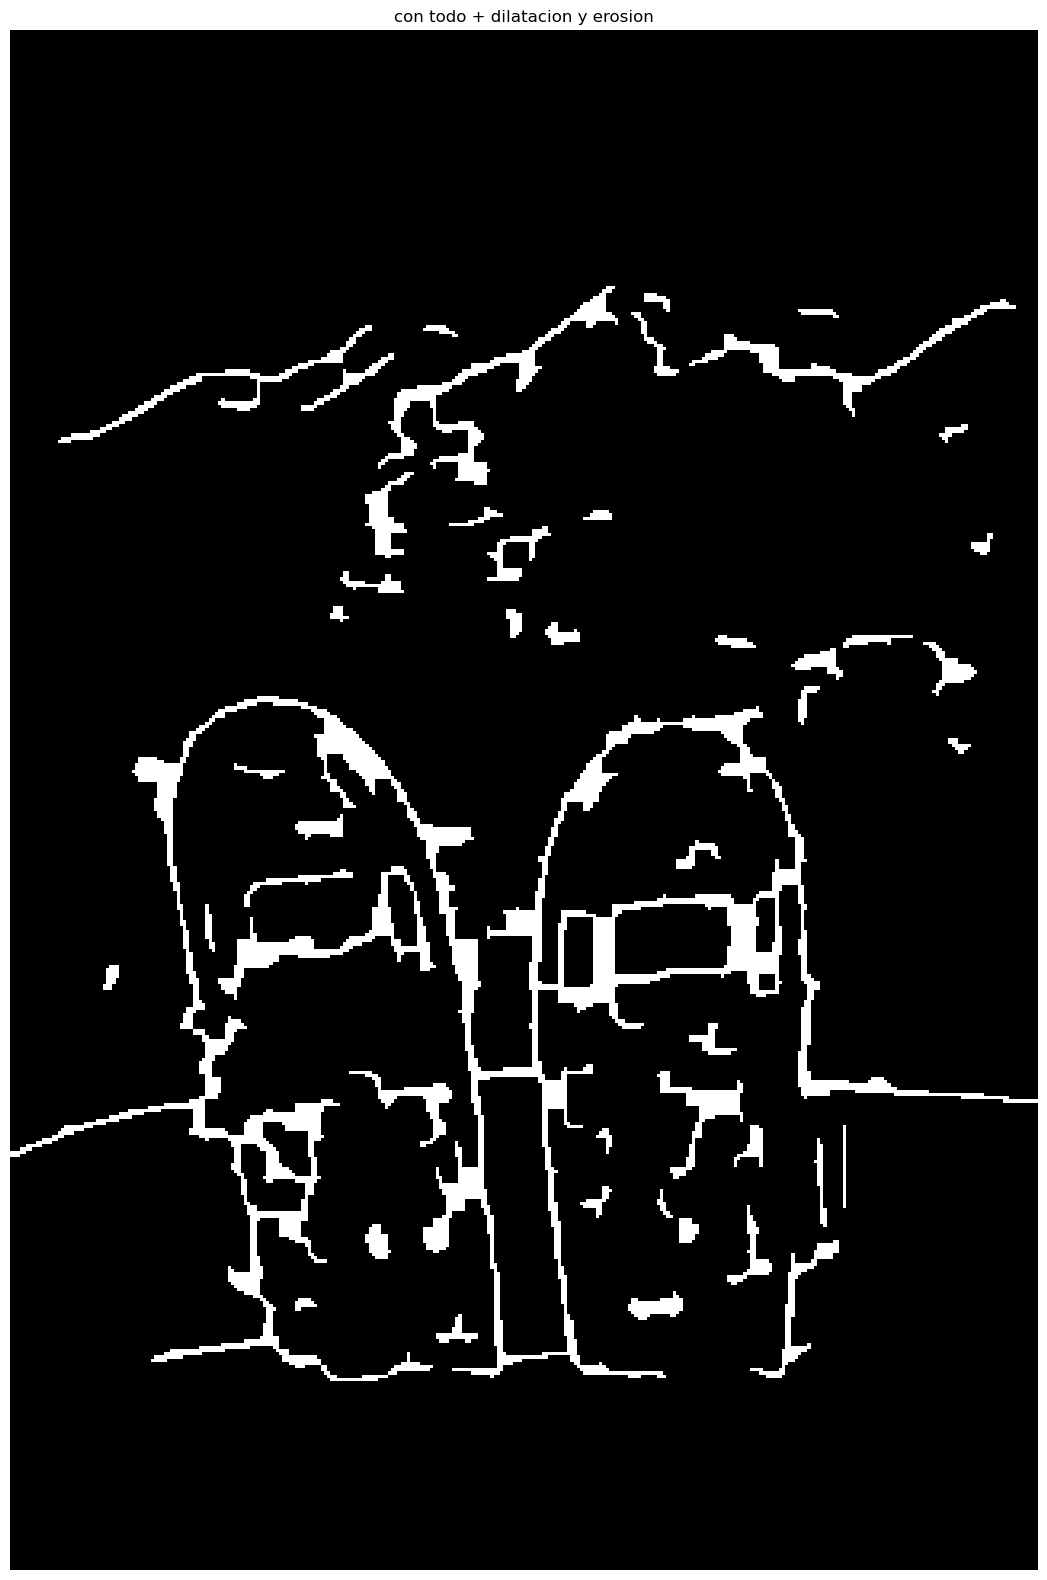

In [22]:
#dilatamos y erosionamos

# Definir el elemento estructurante
kernel = np.ones((3,3), np.uint8)

# Dilatación
dilatacion = cv2.dilate(bordes4, kernel, iterations=2)

# Erosión
bordes5 = cv2.erode(dilatacion, kernel, iterations=2)

print(bordes5.shape,np.unique(bordes5))

# bordes5=limpiar(bordes5,16)
# bordes5=bordes5*255
# print(np.unique(bordes5))

#la muestro en pantalla para ver lo que he leido
plt.figure(figsize=(20, 20))
plt.title('con todo + dilatacion y erosion')
plt.imshow(bordes5, cmap="grey")
plt.axis('off')

In [23]:
#guardado de imagenes para memoria

memoria="imagenes_memoria"
io.imsave(os.path.join(memoria,"bordes_final_"+ foto+".jpg"), bordes5)

In [24]:
labeled_image, num_features = ndimage.label(bordes5)

(-0.5, 320.5, 480.5, -0.5)

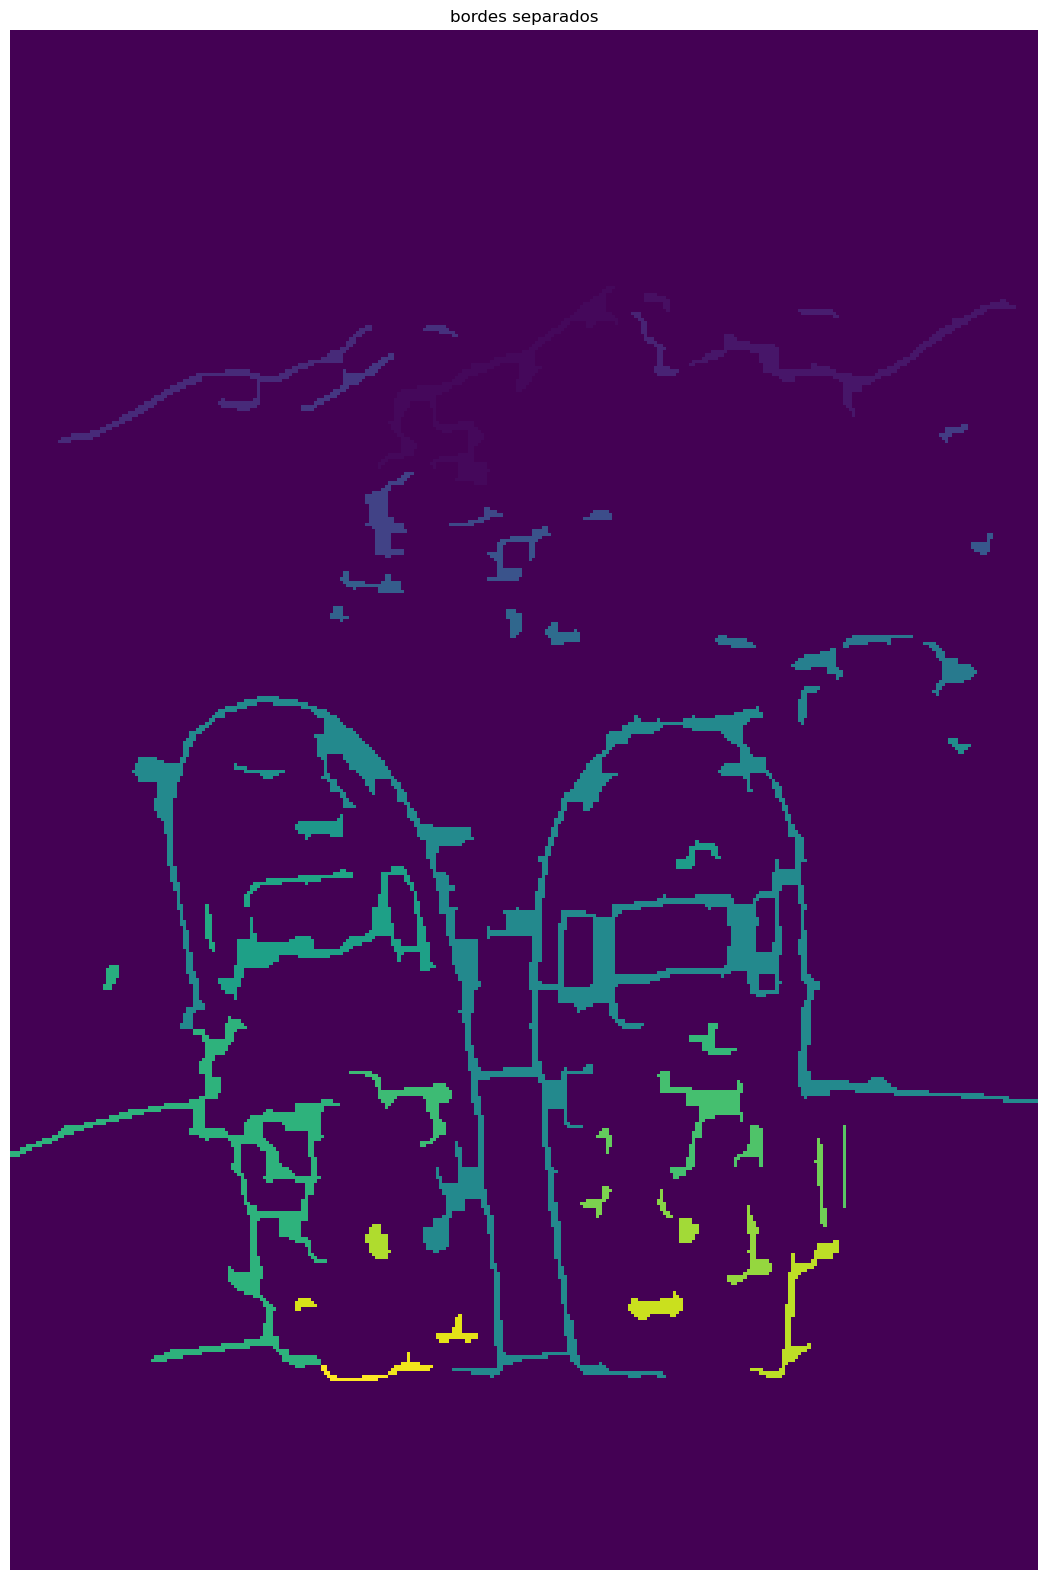

In [25]:
plt.figure(figsize=(20, 20))
plt.title('bordes separados')
plt.imshow(labeled_image)
plt.axis('off')

In [26]:
bordes5=(bordes5/255).astype(np.uint8)

In [27]:
#guardamos la imagen que esamos consiguiendo en intercambio
inter="compartir"
np.save(os.path.join(inter,'bordes_mejorados'),bordes5)
np.save(os.path.join(inter,'bordes_limpios'),bordes4)

In [28]:
bordes5.shape

(481, 321)

In [29]:
np.unique(bordes5)

array([0, 1], dtype=uint8)

Comparativa con la imagen inicial

(-0.5, 320.5, 480.5, -0.5)

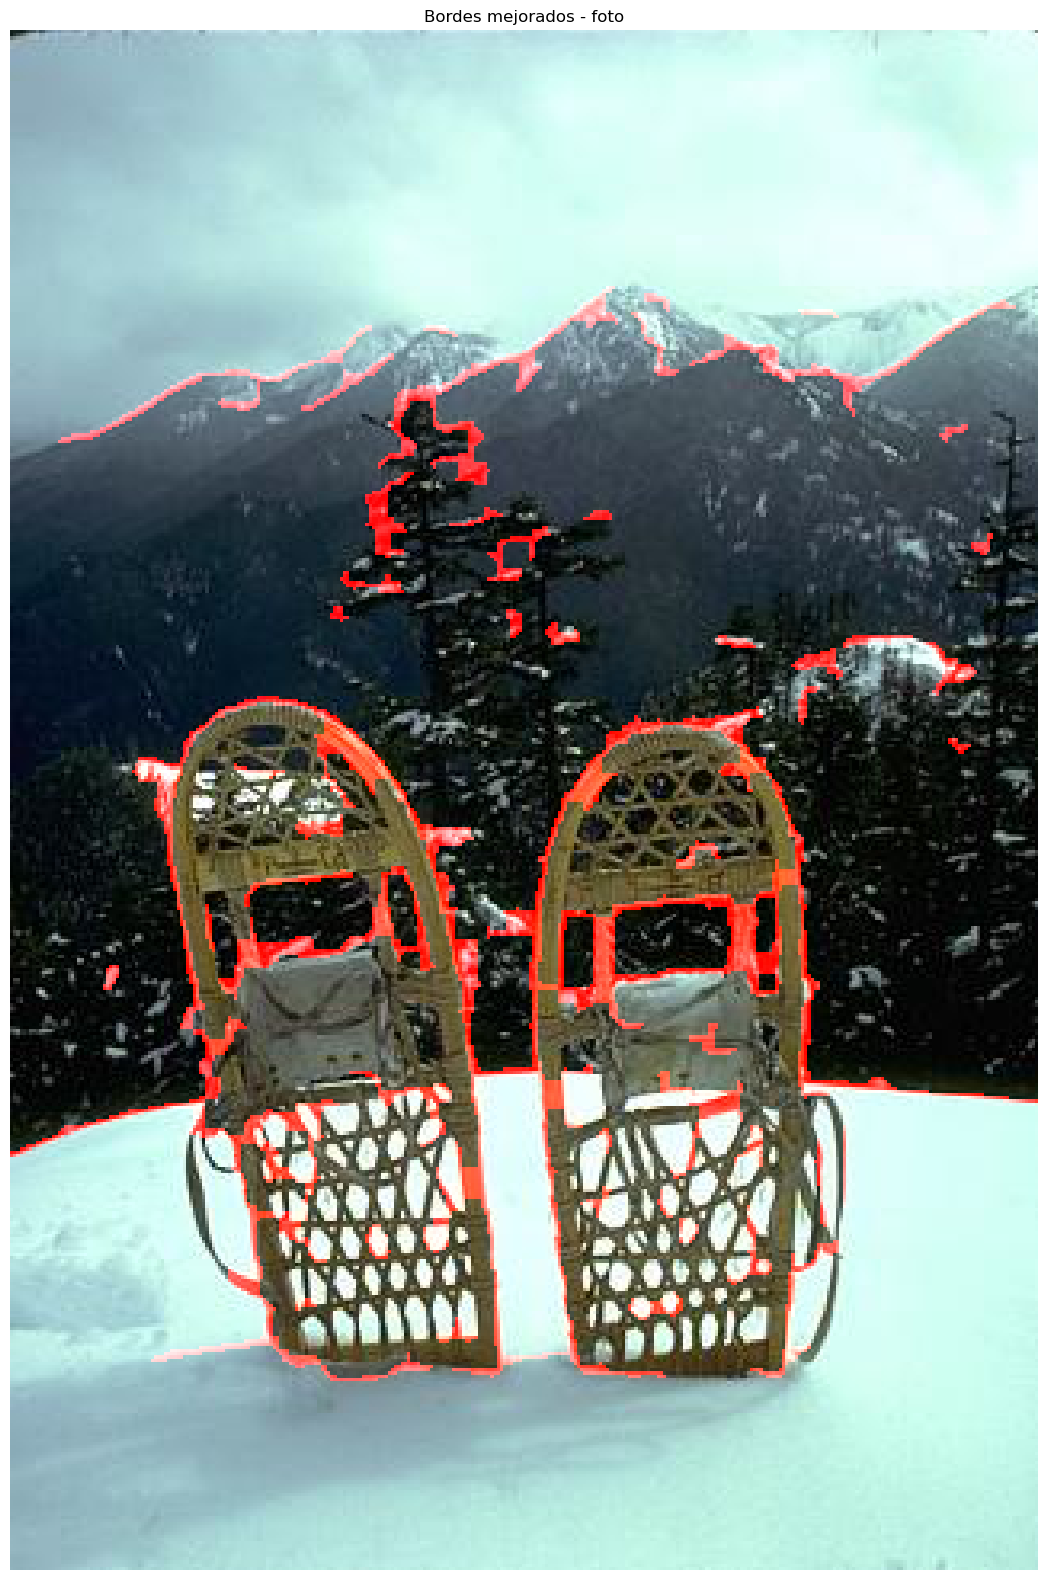

In [30]:
#componemos la imagen final

comparativa=np.copy(imagen_org)

#creamos un borde rojo para diferenciarlo

comparativa[:,:,0]=np.where(bordes5==1,255,comparativa[:,:,0])

plt.figure(figsize=(20, 20))
plt.title('Bordes mejorados - foto')
plt.imshow(comparativa)
plt.axis('off')

In [31]:
np.unique(bordes5)

array([0, 1], dtype=uint8)

In [33]:
np.unique(labeled_image)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51])

In [34]:
# for i in np.unique(labeled_image):
    
#     aux=np.where(labeled_image==i,1,0)
#     plt.figure(figsize=(5, 5))
#     plt.title('segmento')
#     plt.imshow(aux,cmap="grey")
#     plt.axis('off')
    


In [35]:
# labeled_image=reordenar(labeled_image)
# np.unique(labeled_image)

In [36]:
#guardamos la imagen que esamos consiguiendo en intercambio
inter="compartir"
np.save(os.path.join(inter,'bordes_separados'),labeled_image)

In [37]:
np.unique(labeled_image)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51])